In [3]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
mongo_uri = "mongodb://localhost:27017"
connection = MongoClient(mongo_uri)

# CREATE DATABASE
database = connection['SDN_data']
# CREATE COLLECTION
collection = database['BW_server']

In [4]:
!python --version

Python 2.7.17


In [2]:
data = pd.DataFrame(list(collection.find()))
data.head()

""


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 9 columns):
_id                1025 non-null object
byteReceived       1025 non-null object
byteSent           1025 non-null object
delay              1025 non-null object
dst                1025 non-null object
linkUtilization    1025 non-null object
packetLoss         1025 non-null object
src                1025 non-null object
time               1025 non-null object
dtypes: object(9)
memory usage: 72.1+ KB


In [10]:
columns = ['byteSent', 'byteReceived', 'delay', 'packetLoss', 'linkUtilization']

In [11]:
for col in columns:
    data[col] = data[col].astype(float)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# the size of A4 paper
plt.figure(figsize=(15,8))
#sns.lineplot(data=data['delay'])

<Figure size 1500x800 with 0 Axes>

In [13]:
data['time'] = data['time'].astype(int)

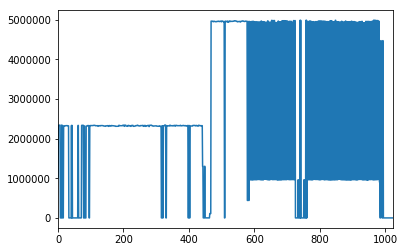

In [24]:
data['byteSent'].plot()

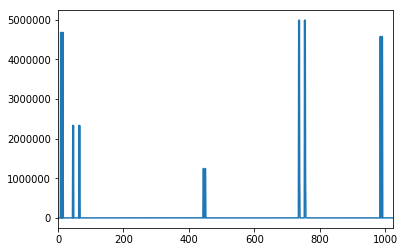

In [25]:
data['byteReceived'].plot()

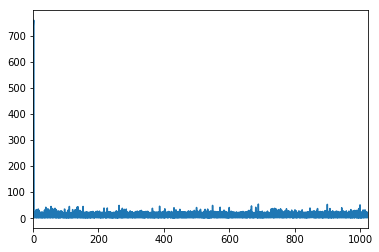

In [15]:
data['delay'].plot()

In [16]:
count_labels = 0
times = data['time'].values
first_time = times[0]
kq = []
for time in times:
    if first_time + 100000 > time:
        kq.append(count_labels)
    else:
        count_labels += 1
        first_time = time
        kq.append(count_labels)


In [17]:
len(kq)

1025

In [18]:
data['label_time'] = kq

In [19]:
data

,_id,byteReceived,byteSent,delay,dst,linkUtilization,packetLoss,src,time,label_time
0,622de785fafa1df9166304f2,278.0,1023902.0,2.0,of:0000000000000009,0.102418,0.0,of:0000000000000008,1647175557833,0
1,622de78ffafa1df9166304f3,556.0,2333642.0,738.0,of:0000000000000009,0.233420,1.0,of:0000000000000008,1647175567870,0
2,622de78ffafa1df9166304f4,556.0,2333642.0,760.0,of:0000000000000009,0.233420,0.0,of:0000000000000008,1647175567892,0
3,622de792fafa1df9166304f5,556.0,2333642.0,2.0,of:0000000000000009,0.233420,0.0,of:0000000000000008,1647175570233,0
4,622de792fafa1df9166304f6,556.0,2333642.0,21.0,of:0000000000000009,0.233420,0.0,of:0000000000000008,1647175570253,0
5,622de795fafa1df9166304f7,278.0,2340854.0,2.0,of:0000000000000009,0.234113,0.0,of:0000000000000008,1647175573333,0
6,622de795fafa1df9166304f8,278.0,2340854.0,25.0,of:0000000000000009,0.234113,0.0,of:0000000000000008,1647175573356,0
7,622de795fafa1df9166304f9,840.0,834.0,2.0,of:000000000000000a,0.461939,0.0,of:0000000000000009,1647175573533,0
8,622de795fafa1df9166304fa,4672984.0,834.0,2.0,of:0000000000000008,0.000167,0.0,of:0000000000000009,1647175573533,0
9,622de795fafa1df9166304fb,840.0,834.0,27.0,of:000000000000000a,0.461939,0.0,of:0000000000000009,1647175573558,0


In [20]:
kq_tich = []
for i, cluster in data.groupby('label_time'):
    kq_tich.append(np.prod(cluster['delay'] + 0.001))
    

In [21]:
kq_tich = np.array(kq_tich)

In [ ]:
df = pd.DataFrame(kq_tich)


df.to_csv("/home/onos/Downloads/flaskSDN/phanTichDijsktra.csv", index = False, header=False)

In [ ]:
kq_tich

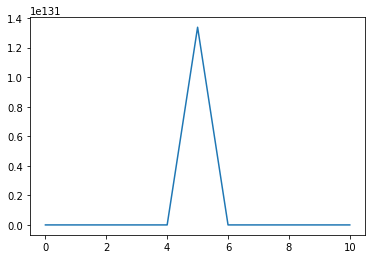

In [22]:
# dijktra 
plt.plot(kq_tich[4:])

In [ ]:
def get_min_max_scale(x):
    print(x)    
    min, max = x.min(), x.max()
    #print("MIN = ", min, "MAX = ", max)
    # cong them 0.1 de tranh mau so bang 0 
    x_scaled = (x - min) / (max - min + 0.1)
    return x_scaled

In [ ]:
import numpy as np

In [ ]:
column = ['delay', 'byteSent']
for col in column:
    print(data[col])
    data[col] = get_min_max_scale(data[col])